In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/173.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/491.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/379.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/248.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/94.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/480.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/236.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/340.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/48.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/513.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/350.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/314.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/227.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/238.png
/kaggle/input/v2-plant-seedlings-dataset/Scentless Mayweed/61.pn

In [32]:
import torch
import fastai
from fastai.vision.all import *

In [33]:
path = Path("/kaggle/input/v2-plant-seedlings-dataset")


In [34]:
# now lets create a fastai datablock
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # specify the nature of indep/dep variables
    get_items=get_image_files,  # define how to access the data
    splitter=RandomSplitter(valid_pct=0.15, seed=40),  # define how we split data
    get_y=parent_label,  # label each image by the name of folder
    item_tfms=Resize((181, 156), method='crop'),  # resize images through cropping
    batch_tfms=aug_transforms()  # apply transformations
)


In [35]:
# now using this datablock object lets create our dataloader
dls = data.dataloaders(path)

In [36]:
if torch.cuda.is_available():
    print("GPU is available...")
else:
    print("GPU is not available. Please obtain access to a GPU to continue...")

GPU is available...


In [37]:
model = cnn_learner( dls,  # our data
    models.resnet34,  # lets use a resnet34 pretrained model
    metrics=[error_rate, accuracy]  # use both error rate and accuracy metrics
)

SuggestedLRs(valley=0.0020892962347716093)

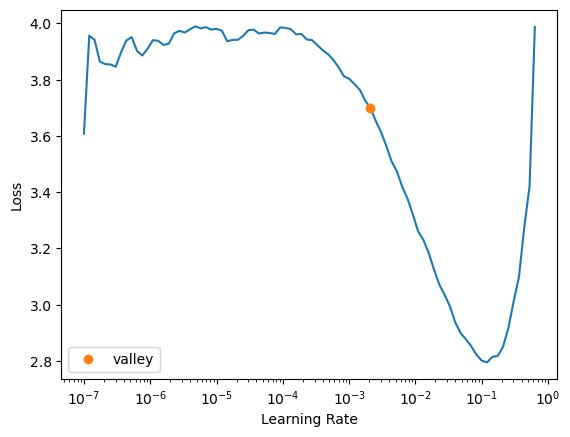

In [38]:
# produce a plot of how various learning rates affect loss
model.lr_find()

In [39]:
model.fit_one_cycle(4, 2e-3) # train the randomly added layers for 6 epochs
model.unfreeze()  # now we can 'unfreeze' the upstream pretrained layers

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.201640,0.400658,0.130042,0.869958,02:46
1,0.440278,0.227226,0.077062,0.922938,02:44
2,0.251267,0.189860,0.060205,0.939795,01:43
3,0.223814,0.180743,0.059603,0.940397,01:46


SuggestedLRs(valley=3.630780702224001e-05)

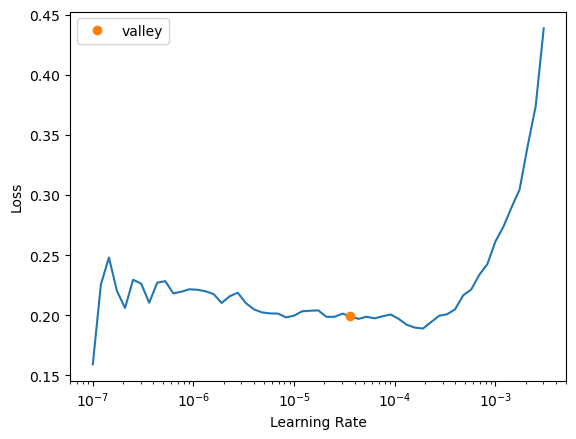

In [40]:
model.lr_find()

In [41]:
# train the model for 7 more epochs and apply the discriminative learning rates
model.fit_one_cycle(7, lr_max=slice(7e-5, 5e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.211792,0.205713,0.065021,0.934979,01:42
1,0.233926,0.298748,0.090909,0.909091,01:41
2,0.154199,0.150917,0.045756,0.954244,01:43
3,0.105721,0.125737,0.036123,0.963877,01:41
4,0.060395,0.083557,0.024684,0.975316,01:41
5,0.028812,0.069629,0.019266,0.980734,01:41
6,0.020450,0.060660,0.015653,0.984347,01:40


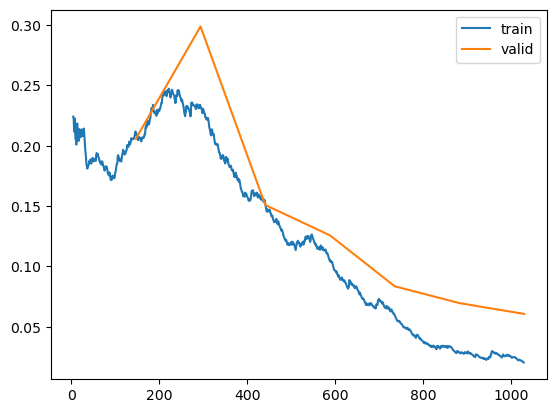

In [42]:
# plot the losses
model.recorder.plot_loss()

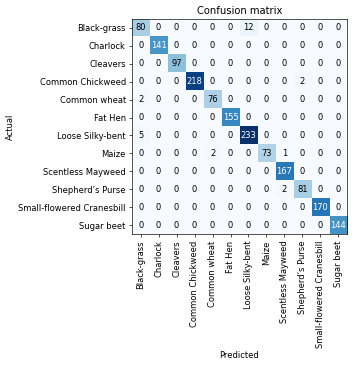

In [43]:
# plot a confusion matrix between labels
ClassificationInterpretation.from_learner(model).plot_confusion_matrix(figsize=(6,6), dpi=60)

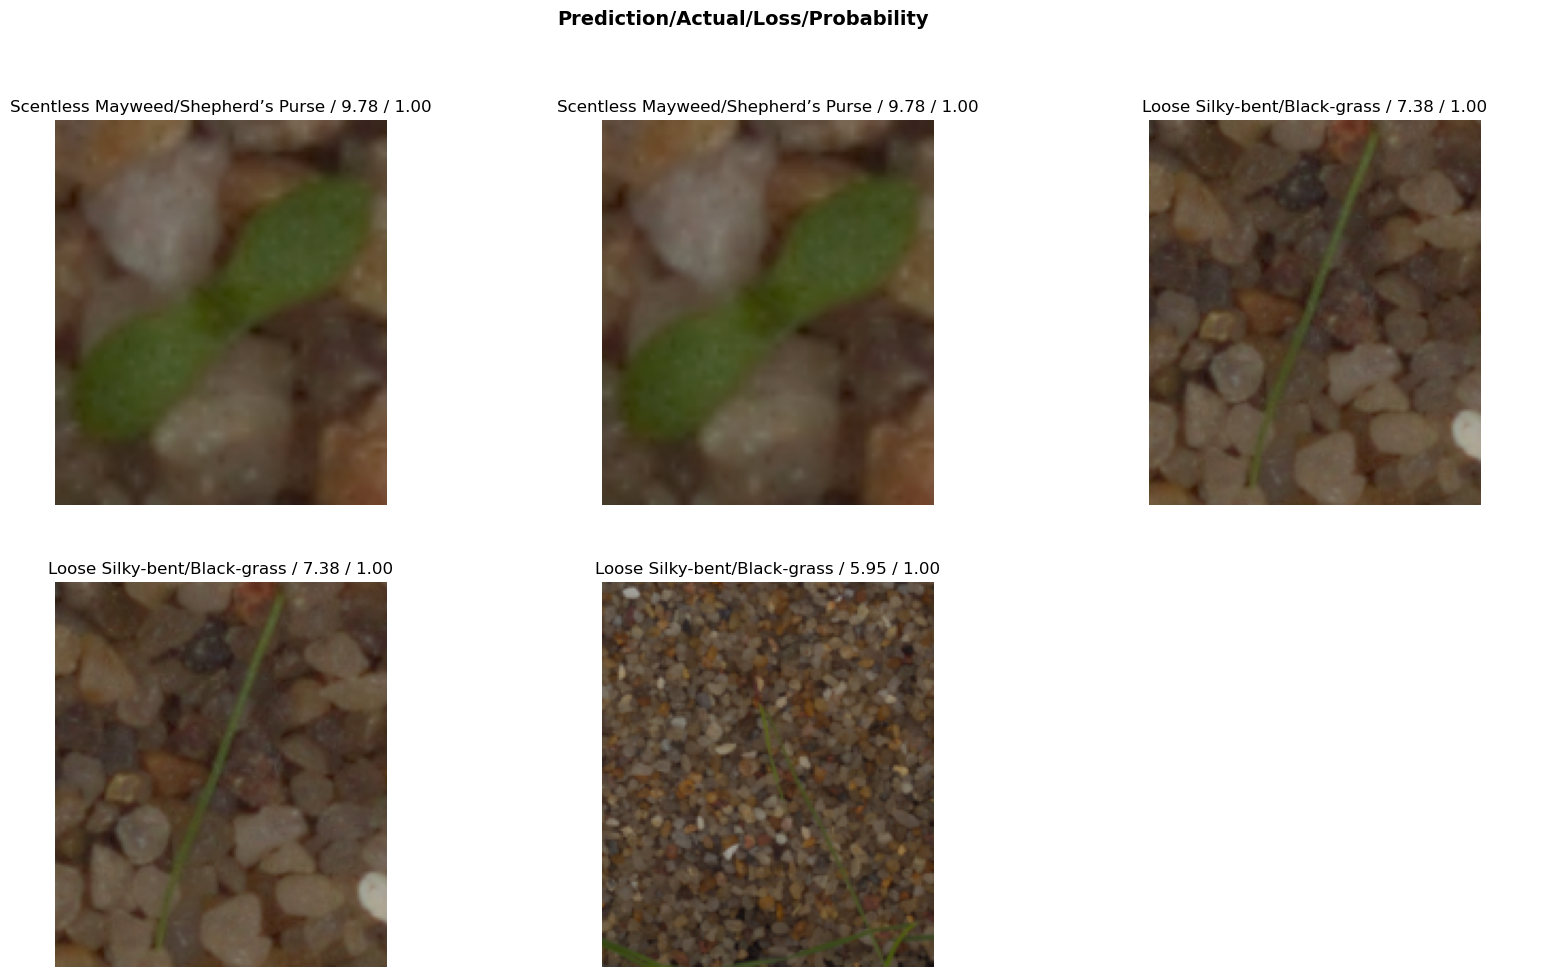

In [46]:
# plot some of the top losses
ClassificationInterpretation.from_learner(model).plot_top_losses(5, nrows=2, figsize=(20,11))

In [47]:
model.save("stage-1-34")

Path('models/stage-1-34.pth')